In [8]:
import sys
import StepMiner as smn
import HegemonUtil as hu
import re
import numpy as np
import scipy
import io
from scipy import io
import math
import itertools
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import statsmodels.stats.proportion
import seaborn as sns
import scanpy as sc
import GEOparse

### GSE138002

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE138002

In [7]:
Matrix = (scipy.io.mmread('GSE138002_Final_matrix.mtx'))
B = Matrix.todense()
count_mtx = pd.DataFrame(B)
count_mtx

0       1       2       3       4       5       6       7       8       \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
33689       0       0       0       0       0       0       0       0       0   
33690       0       0       0       0       0       0       0       0       0   
33691       0       0       0       0       0       0       0       0       0   
33692       0       0       0       0       0       0       0       0       0   
33693       0       0       0       0       0       0       0       0       0   

       9       ...  118545  118546  118547  118548  118549  118550  118551  \
0           0  ...       0       0       0       0       0       0       0   
1           0  ...       0       0       0       0       0       0       0   
2           0  ...       0       0       0       0       0       0       0   
3           0  ...       0       0       0       0       0       0       0   
4           0  ...       0       0       0       0       0       0       0   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
33689       0  ...       0       0       0       0       0       0       0   
33690       0  ...       0       0       0       0       0       0       0   
33691       0  ...       0       0       0       0       0       0       0   
33692       0  ...       0       0       0       0       0       0       0   
33693       0  ...       0       0       0       0       0       0       0   

       118552  118553  118554  
0           0       0       0  
1           0       0       0  
2           0       0       0  
3           0       0       0  
4           0       0       0  
...       ...     ...     ...  
33689       0       0       0  
33690       0       0       0  
33691       0       0       0  
33692       0       0       0  
33693       0       0       0  

[33694 rows x 118555 columns]

Normalise

In [8]:
adata = sc.AnnData(count_mtx.T)
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
norm_df = pd.DataFrame(adata.X)
norm_df = norm_df.T

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
norm_df.columns = np.array(barcodes["barcode"])

In [28]:
#final expr file
expr_norm = pd.concat([genes,norm_df], axis=1)
expr_norm

ProbeID          Name  24_Day.AACTCCCGTTTAGGAA-1  \
0      ENSG00000243485  RP11-34P13.3                        0.0   
1      ENSG00000237613       FAM138A                        0.0   
2      ENSG00000186092         OR4F5                        0.0   
3      ENSG00000238009  RP11-34P13.7                        0.0   
4      ENSG00000239945  RP11-34P13.8                        0.0   
...                ...           ...                        ...   
33689  ENSG00000277856    AC233755.2                        0.0   
33690  ENSG00000275063    AC233755.1                        0.0   
33691  ENSG00000271254    AC240274.1                        0.0   
33692  ENSG00000277475    AC213203.1                        0.0   
33693  ENSG00000268674       FAM231B                        0.0   

       24_Day.AGATCTGTCTTGCATT-1  24_Day.AGCAGCCTCCGCTGTT-1  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
33689                        0.0                        0.0   
33690                        0.0                        0.0   
33691                        0.0                        0.0   
33692                        0.0                        0.0   
33693                        0.0                        0.0   

       24_Day.AGGGAGTTCGTAGATC-1  24_Day.ATTATCCTCGCCCTTA-1  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
33689                        0.0                        0.0   
33690                        0.0                        0.0   
33691                        0.0                        0.0   
33692                        0.0                        0.0   
33693                        0.0                        0.0   

       24_Day.CATGCCTTCCAAACAC-1  24_Day.CCAATCCCAGGCGATA-1  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
33689                        0.0                        0.0   
33690                        0.0                        0.0   
33691                        0.0                        0.0   
33692                        0.0                        0.0   
33693                        0.0                        0.0   

       24_Day.CGCGGTATCCCTAATT-1  ...  Hpnd8_rep2.TTTGGTTGTGTTCTTT-1  \
0                            0.0  ...                            0.0   
1                            0.0  ...                            0.0   
2                            0.0  ...                            0.0   
3                            0.0  ...                            0.0   
4                            0.0  ...                            0.0   
...                          ...  ...                            ...   
33689                        0.0  ...                            0.0   
33690                        0.0  ...                            0.0   
33691                        0.0  ...                            0.0   
33692                        0.0  ...                            0.0   
33693                        0.0  ...                            0.0   

       Hpnd8_rep2.TTTGGTTGTTAAAGAC-1  Hpnd8_rep2.TTTGGTTTCACCCTCA-1  \
0  

In [9]:
barcodes = pd.DataFrame(pd.read_csv('GSE138002_Final_barcodes.csv', sep = ';', header=0))
barcodes

Unnamed: 0                        barcode  \
0          X24_Day.AACTCCCGTTTAGGAA.1      24_Day.AACTCCCGTTTAGGAA-1   
1          X24_Day.AGATCTGTCTTGCATT.1      24_Day.AGATCTGTCTTGCATT-1   
2          X24_Day.AGCAGCCTCCGCTGTT.1      24_Day.AGCAGCCTCCGCTGTT-1   
3          X24_Day.AGGGAGTTCGTAGATC.1      24_Day.AGGGAGTTCGTAGATC-1   
4          X24_Day.ATTATCCTCGCCCTTA.1      24_Day.ATTATCCTCGCCCTTA-1   
...                               ...                            ...   
118550  Hpnd8_rep2.TTTGGTTTCTCATTCA.1  Hpnd8_rep2.TTTGGTTTCTCATTCA-1   
118551  Hpnd8_rep2.TTTGTCAAGATCCGAG.1  Hpnd8_rep2.TTTGTCAAGATCCGAG-1   
118552  Hpnd8_rep2.TTTGTCACAGTTTACG.1  Hpnd8_rep2.TTTGTCACAGTTTACG-1   
118553  Hpnd8_rep2.TTTGTCACATGTCCTC.1  Hpnd8_rep2.TTTGTCACATGTCCTC-1   
118554  Hpnd8_rep2.TTTGTCAGTCTCCATC.1  Hpnd8_rep2.TTTGTCAGTCTCCATC-1   

            sample     age  num_genes_expressed  Total_mRNAs   sample_type  \
0           24_Day  24_Day                 1415         3035  Whole Retina   
1           24_Day  24_Day                 1348         2847  Whole Retina   
2           24_Day  24_Day                 2720         6651  Whole Retina   
3           24_Day  24_Day                 1496         3170  Whole Retina   
4           24_Day  24_Day                 1667         3592  Whole Retina   
...            ...     ...                  ...          ...           ...   
118550  Hpnd8_rep2   Hpnd8                  756         1359     Periphery   
118551  Hpnd8_rep2   Hpnd8                 1370         2524     Periphery   
118552  Hpnd8_rep2   Hpnd8                 1658         3534     Periphery   
118553  Hpnd8_rep2   Hpnd8                 1461         2997     Periphery   
118554  Hpnd8_rep2   Hpnd8                 1451         2758     Periphery   

              umap1_coord       umap2_coord       umap3_coord umap2_CellType  
0        1,58621820377437  1,08357536633052  1,52603237017909           RPCs  
1        1,50731352978391  1,04456908355449  1,38827998484047           RPCs  
2         1,1709910296148  1,42042264659189  1,40184192307233           RPCs  
3        1,72879997970771  1,18589629993992  1,41830531041233           RPCs  
4        1,58091022850708  1,12432423073327  1,50612667958476           RPCs  
...                   ...               ...               ...            ...  
118550  0,204472609389361  1,91538792091578  1,35541764315016           Rods  
118551  0,170620844557091  1,90173857166162  1,28717477628747           Rods  
118552  0,229240043847259  1,92862993231925  1,29207265335599           Rods  
118553  0,154340162417886  1,91652180227353  1,32361176873157           Rods  
118554  0,217268986221138  1,91426468306231  1,25882714551162           Rods  

[118555 rows x 11 columns]

In [17]:
genes = pd.DataFrame(pd.read_csv('GSE138002_genes.csv', sep = ';',header=0))
genes.columns = ["ProbeID1","ProbeID","Name"]
genes = genes[["ProbeID","Name"]]
genes

ProbeID          Name
0      ENSG00000243485  RP11-34P13.3
1      ENSG00000237613       FAM138A
2      ENSG00000186092         OR4F5
3      ENSG00000238009  RP11-34P13.7
4      ENSG00000239945  RP11-34P13.8
...                ...           ...
33689  ENSG00000277856    AC233755.2
33690  ENSG00000275063    AC233755.1
33691  ENSG00000271254    AC240274.1
33692  ENSG00000277475    AC213203.1
33693  ENSG00000268674       FAM231B

[33694 rows x 2 columns]

Ih file

In [44]:
%run process.py

21-May-2021 04:24:47 INFO GEOparse - Parsing ./GSE138002_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE138002_family.soft.gz: 
21-May-2021 04:24:47 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
21-May-2021 04:24:47 DEBUG GEOparse - SERIES: GSE138002
DEBUG:GEOparse:SERIES: GSE138002
21-May-2021 04:24:47 DEBUG GEOparse - PLATFORM: GPL18573
DEBUG:GEOparse:PLATFORM: GPL18573
21-May-2021 04:24:47 DEBUG GEOparse - SAMPLE: GSM4096494
DEBUG:GEOparse:SAMPLE: GSM4096494
21-May-2021 04:24:47 DEBUG GEOparse - SAMPLE: GSM4096495
DEBUG:GEOparse:SAMPLE: GSM4096495
21-May-2021 04:24:47 DEBUG GEOparse - SAMPLE: GSM4096496
DEBUG:GEOparse:SAMPLE: GSM4096496
21-May-2021 04:24:47 DEBUG GEOparse - SAMPLE: GSM4096497
DEBUG:GEOparse:SAMPLE: GSM4096497
21-May-2021 04:24:47 DEBUG GEOparse - SAMPLE: GSM4096498
DEBUG:GEOparse:SAMPLE: GSM4096498
21-May-2021 04:24:47 DEBUG GEOparse - SAMPLE: GSM4096499
DEBUG:GEOparse:SAMPLE: GSM4096499
21-May-2021 04:24:47 DEBUG GEOparse - SAMPLE: GSM4096500
D

-Loading from ./GSE138002_family.soft.gz
Done processing
Starting survival_ih
array_header ['GSM4096494', 'GSM4096495', 'GSM4096496', 'GSM4096497', 'GSM4096498', 'GSM4096499', 'GSM4096500', 'GSM4096501', 'GSM4096502', 'GSM4096503', 'GSM4096504', 'GSM4096505']
clinical_header ['24 days in culture human retinal organoid', '30 days in culture human retinal organoid', '42 days in culture human retinal organoid', '59 days in culture human retinal organoid', 'Hgw9 retina scRNA-seq', 'Hgw11 retina scRNA-seq', 'Hgw13 retina scRNA-seq', 'Hgw15 retina scRNA-seq', 'Hgw17 retina scRNA-seq', 'Hgw19 replicate 1 retina scRNA-seq', 'Hgw19 replicate 2 retina scRNA-seq', '86 year old Adult retina scRNA-seq']
Done with survival_ih


In [30]:
ih_df = pd.DataFrame(pd.read_csv('GSE138002-GPL18573-ih.txt', sep = '\t', header=0))
ih_df

ArrayID ArrayHeader                             ClinicalHeader
0   GSM4096494  GSM4096494  24 days in culture human retinal organoid
1   GSM4096495  GSM4096495  30 days in culture human retinal organoid
2   GSM4096496  GSM4096496  42 days in culture human retinal organoid
3   GSM4096497  GSM4096497  59 days in culture human retinal organoid
4   GSM4096498  GSM4096498                      Hgw9 retina scRNA-seq
5   GSM4096499  GSM4096499                     Hgw11 retina scRNA-seq
6   GSM4096500  GSM4096500                     Hgw13 retina scRNA-seq
7   GSM4096501  GSM4096501                     Hgw15 retina scRNA-seq
8   GSM4096502  GSM4096502                     Hgw17 retina scRNA-seq
9   GSM4096503  GSM4096503         Hgw19 replicate 1 retina scRNA-seq
10  GSM4096504  GSM4096504         Hgw19 replicate 2 retina scRNA-seq
11  GSM4096505  GSM4096505         86 year old Adult retina scRNA-seq

Survival file

In [31]:
surv = pd.DataFrame(pd.read_csv('GSE138002-GPL18573-survival.txt', sep = '\t', header=0))
surv['c developmental stage (ch1)'] = np.nan
cols = ['ArrayId','time','status','c title','c source_name (ch1)','c organism (ch1)','c taxid (ch1)','c developmental stage (ch1)', 'c tissue (ch1)','c cell source (ch1)','c molecule (ch1)',]
surv = surv[cols]
surv

ArrayId  time  status                                    c title  \
0   GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
1   GSM4096495   NaN     NaN  30 days in culture human retinal organoid   
2   GSM4096496   NaN     NaN  42 days in culture human retinal organoid   
3   GSM4096497   NaN     NaN  59 days in culture human retinal organoid   
4   GSM4096498   NaN     NaN                      Hgw9 retina scRNA-seq   
5   GSM4096499   NaN     NaN                     Hgw11 retina scRNA-seq   
6   GSM4096500   NaN     NaN                     Hgw13 retina scRNA-seq   
7   GSM4096501   NaN     NaN                     Hgw15 retina scRNA-seq   
8   GSM4096502   NaN     NaN                     Hgw17 retina scRNA-seq   
9   GSM4096503   NaN     NaN         Hgw19 replicate 1 retina scRNA-seq   
10  GSM4096504   NaN     NaN         Hgw19 replicate 2 retina scRNA-seq   
11  GSM4096505   NaN     NaN         86 year old Adult retina scRNA-seq   

   c source_name (ch1) c organism (ch1)  c taxid (ch1)  \
0        Retinal Cells     Homo sapiens           9606   
1        Retinal Cells     Homo sapiens           9606   
2        Retinal Cells     Homo sapiens           9606   
3        Retinal Cells     Homo sapiens           9606   
4        Retinal Cells     Homo sapiens           9606   
5        Retinal Cells     Homo sapiens           9606   
6        Retinal Cells     Homo sapiens           9606   
7        Retinal Cells     Homo sapiens           9606   
8        Retinal Cells     Homo sapiens           9606   
9        Retinal Cells     Homo sapiens           9606   
10       Retinal Cells     Homo sapiens           9606   
11       Retinal Cells     Homo sapiens           9606   

    c developmental stage (ch1)                c tissue (ch1)  \
0                           NaN  dissociated retinal organoid   
1                           NaN  dissociated retinal organoid   
2                           NaN  dissociated retinal organoid   
3                           NaN  dissociated retinal organoid   
4                           NaN            dissociated retina   
5                           NaN            dissociated retina   
6                           NaN            dissociated retina   
7                           NaN            dissociated retina   
8                           NaN            dissociated retina   
9                           NaN            dissociated retina   
10                          NaN            dissociated retina   
11                          NaN            dissociated retina   

                                  c cell source (ch1) c molecule (ch1)  
0   retinal cells from IMR-90 induced pluripotent ...        polyA RNA  
1   retinal cells from IMR-90 induced pluripotent ...        polyA RNA  
2   retinal cells from IMR-90 induced pluripotent ...        polyA RNA  
3   retinal cells from IMR-90 induced pluripotent ...        polyA RNA  
4                                      primary tissue        polyA RNA  
5                                      primary tissue        polyA RNA  
6                                      primary tissue        polyA RNA  
7                                      primary tissue        polyA RNA  
8                                      primary tissue        polyA RNA  
9                                      primary tissue        polyA RNA  
10                                     primary tissue        polyA RNA  
11                                     primary tissue        polyA RNA

In [33]:
samples = np.unique(np.array(barcodes['sample']))
print(samples)

['24_Day' '30_Day' '42_Day' '59_Day' 'Adult' 'Hgw11' 'Hgw12' 'Hgw13'
 'Hgw14' 'Hgw15' 'Hgw16' 'Hgw17' 'Hgw18' 'Hgw19_rep1' 'Hgw19_rep2'
 'Hgw20_rep1' 'Hgw20_rep2' 'Hgw22' 'Hgw24_rep1' 'Hgw24_rep2' 'Hgw27'
 'Hgw9' 'Hpnd8_rep1' 'Hpnd8_rep2']


In [45]:
gse_dict = {"GSM4096494": "24_Day",  'GSM4096495': '30_Day', 'GSM4096496': '42_Day', 'GSM4096497': '59_Day', 'GSM4096505': 'Adult', \
 'GSM4096499': 'Hgw11', 'GSM3209026': 'Hgw12', 'GSM4096500': 'Hgw13', 'GSM3209027': 'Hgw14', 'GSM4096501': 'Hgw15', \
 'GSM3209028': 'Hgw16', 'GSM4096502': 'Hgw17', 'GSM3209029': 'Hgw18', 'GSM4096503': 'Hgw19_rep1', 'GSM4096504': 'Hgw19_rep2',\
 'GSM3938920': 'Hgw20_rep1', 'GSM3938921': 'Hgw20_rep2', 'GSM3209030': 'Hgw22', 'GSM3209031': 'Hgw24_rep1', \
 'GSM3209032': 'Hgw24_rep2', 'GSM3209033': 'Hgw27', 'GSM4096498': 'Hgw9', 'GSM3964256': 'Hpnd8_rep1', 'GSM3964257': 'Hpnd8_rep2' }
gsms = pd.DataFrame()
gsms['ArrayId'] = np.array(list(gse_dict.keys()))
gsms['sample'] = samples
gsms

ArrayId      sample
0   GSM4096494      24_Day
1   GSM4096495      30_Day
2   GSM4096496      42_Day
3   GSM4096497      59_Day
4   GSM4096505       Adult
5   GSM4096499       Hgw11
6   GSM3209026       Hgw12
7   GSM4096500       Hgw13
8   GSM3209027       Hgw14
9   GSM4096501       Hgw15
10  GSM3209028       Hgw16
11  GSM4096502       Hgw17
12  GSM3209029       Hgw18
13  GSM4096503  Hgw19_rep1
14  GSM4096504  Hgw19_rep2
15  GSM3938920  Hgw20_rep1
16  GSM3938921  Hgw20_rep2
17  GSM3209030       Hgw22
18  GSM3209031  Hgw24_rep1
19  GSM3209032  Hgw24_rep2
20  GSM3209033       Hgw27
21  GSM4096498        Hgw9
22  GSM3964256  Hpnd8_rep1
23  GSM3964257  Hpnd8_rep2

Add day 8 samples

In [63]:
%run process.py

21-May-2021 05:02:42 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
21-May-2021 05:02:42 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE122nnn/GSE122970/soft/GSE122970_family.soft.gz to ./GSE122970_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE122nnn/GSE122970/soft/GSE122970_family.soft.gz to ./GSE122970_family.soft.gz


-Downloading GSE122970


100%|██████████| 2.08k/2.08k [00:00<00:00, 5.98kB/s]
21-May-2021 05:02:44 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
21-May-2021 05:02:44 DEBUG downloader - Moving /tmp/tmp3wlb9ues to /mnt/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/GSE122970_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmp3wlb9ues to /mnt/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/GSE122970_family.soft.gz
21-May-2021 05:02:44 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE122nnn/GSE122970/soft/GSE122970_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE122nnn/GSE122970/soft/GSE122970_family.soft.gz
21-May-2021 05:02:44 INFO GEOparse - Parsing ./GSE122970_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE122970_family.soft.gz: 
21-May-2021 05:02:44 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
21-May-2021 05:02:44 DEBUG GEOparse - SERIES: GSE122970
DEBUG:GEOparse:SERIE

Done processing
Starting survival_ih
array_header ['GSM3964256', 'GSM3964257']
clinical_header ['postnatal_day8_macula', 'postnatal_day8_periphery']
Done with survival_ih


In [17]:
ih_df_d8 = pd.DataFrame(pd.read_csv('GSE122970-GPL20301-ih.txt', sep = '\t', header=0))
surv_d8 = pd.DataFrame(pd.read_csv('GSE122970-GPL20301-survival.txt', sep = '\t', header=0))

Add remaning samples

In [70]:
%run process.py

21-May-2021 05:06:52 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
21-May-2021 05:06:52 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE116nnn/GSE116106/soft/GSE116106_family.soft.gz to ./GSE116106_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE116nnn/GSE116106/soft/GSE116106_family.soft.gz to ./GSE116106_family.soft.gz


-Downloading GSE116106


100%|██████████| 2.54k/2.54k [00:01<00:00, 2.10kB/s]
21-May-2021 05:06:54 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
21-May-2021 05:06:54 DEBUG downloader - Moving /tmp/tmplftbckzt to /mnt/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/GSE116106_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmplftbckzt to /mnt/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/GSE116106_family.soft.gz
21-May-2021 05:06:54 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE116nnn/GSE116106/soft/GSE116106_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE116nnn/GSE116106/soft/GSE116106_family.soft.gz
21-May-2021 05:06:54 INFO GEOparse - Parsing ./GSE116106_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE116106_family.soft.gz: 
21-May-2021 05:06:54 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
21-May-2021 05:06:54 DEBUG GEOparse - SERIES: GSE116106
DEBUG:GEOparse:SERIE

Done processing
Starting survival_ih
array_header ['GSM3209026', 'GSM3209027', 'GSM3209028', 'GSM3209029', 'GSM3209030', 'GSM3209031', 'GSM3209032', 'GSM3209033', 'GSM3938920', 'GSM3938921']
clinical_header ['GW12_Retina', 'GW14_Retina', 'GW16_Retina', 'GW18_Retina', 'GW22_Retina', 'GW24_1_Retina', 'GW24_2_Retina', 'GW27_Retina', 'GW20_Retina_macula', 'GW20_Retina_periphery']
Done with survival_ih


In [36]:
ih_df_rem = pd.DataFrame(pd.read_csv('GSE116106-GPL20301-ih.txt', sep = '\t', header=0))
surv_rem = pd.DataFrame(pd.read_csv('GSE116106-GPL20301-survival.txt', sep = '\t', header=0))

Merge all

In [37]:
ih_all = pd.concat([ih_df, ih_df_d8, ih_df_rem], axis=0)
surv_all = pd.concat([surv, surv_d8, surv_rem], axis=0)
surv_all

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


ArrayId                                c cell source (ch1)  \
0   GSM4096494  retinal cells from IMR-90 induced pluripotent ...   
1   GSM4096495  retinal cells from IMR-90 induced pluripotent ...   
2   GSM4096496  retinal cells from IMR-90 induced pluripotent ...   
3   GSM4096497  retinal cells from IMR-90 induced pluripotent ...   
4   GSM4096498                                     primary tissue   
5   GSM4096499                                     primary tissue   
6   GSM4096500                                     primary tissue   
7   GSM4096501                                     primary tissue   
8   GSM4096502                                     primary tissue   
9   GSM4096503                                     primary tissue   
10  GSM4096504                                     primary tissue   
11  GSM4096505                                     primary tissue   
0   GSM3964256                                                NaN   
1   GSM3964257                                                NaN   
0   GSM3209026                                                NaN   
1   GSM3209027                                                NaN   
2   GSM3209028                                                NaN   
3   GSM3209029                                                NaN   
4   GSM3209030                                                NaN   
5   GSM3209031                                                NaN   
6   GSM3209032                                                NaN   
7   GSM3209033                                                NaN   
8   GSM3938920                                                NaN   
9   GSM3938921                                                NaN   

   c developmental stage (ch1) c gestational week (ch1) c molecule (ch1)  \
0                          NaN                      NaN        polyA RNA   
1                          NaN                      NaN        polyA RNA   
2                          NaN                      NaN        polyA RNA   
3                          NaN                      NaN        polyA RNA   
4                          NaN                      NaN        polyA RNA   
5                          NaN                      NaN        polyA RNA   
6                          NaN                      NaN        polyA RNA   
7                          NaN                      NaN        polyA RNA   
8                          NaN                      NaN        polyA RNA   
9                          NaN                      NaN        polyA RNA   
10                         NaN                      NaN        polyA RNA   
11                         NaN                      NaN        polyA RNA   
0               postnatal_day8                      NaN        total RNA   
1               postnatal_day8                      NaN        total RNA   
0                          NaN                     GW12        total RNA   
1                          NaN                     GW14        total RNA   
2                          NaN                     GW16        total RNA   
3                          NaN                     GW18        total RNA   
4                          NaN                     GW22        total RNA   
5                          NaN                     GW24        total RNA   
6                          NaN                     GW24        total RNA   
7                          NaN                     GW27        total RNA   
8                          NaN                     GW20        total RNA   
9                          NaN                     GW20        total RNA   

   c organism (ch1) c region (ch1)     c source_name (ch1)  c taxid (ch1)  \
0      Homo sapiens            NaN           Retinal Cells           9606   
1      Homo sapiens            NaN           Retinal Cells           9606   
2      Homo sapiens            NaN           Retinal Cells           9606   
3      Homo sapiens            NaN           Retinal Cells           960

In [43]:
cols = ['ArrayId', 'time', 'status', 'c title', 'c cell source (ch1)', 'c developmental stage (ch1)',
        'c molecule (ch1)', 'c organism (ch1)', 'c region (ch1)', 'c source_name (ch1)',
        'c taxid (ch1)', 'c tissue (ch1)']
surv_all = surv_all[cols]
surv_all

ArrayId  time  status                                    c title  \
0   GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
1   GSM4096495   NaN     NaN  30 days in culture human retinal organoid   
2   GSM4096496   NaN     NaN  42 days in culture human retinal organoid   
3   GSM4096497   NaN     NaN  59 days in culture human retinal organoid   
4   GSM4096498   NaN     NaN                      Hgw9 retina scRNA-seq   
5   GSM4096499   NaN     NaN                     Hgw11 retina scRNA-seq   
6   GSM4096500   NaN     NaN                     Hgw13 retina scRNA-seq   
7   GSM4096501   NaN     NaN                     Hgw15 retina scRNA-seq   
8   GSM4096502   NaN     NaN                     Hgw17 retina scRNA-seq   
9   GSM4096503   NaN     NaN         Hgw19 replicate 1 retina scRNA-seq   
10  GSM4096504   NaN     NaN         Hgw19 replicate 2 retina scRNA-seq   
11  GSM4096505   NaN     NaN         86 year old Adult retina scRNA-seq   
0   GSM3964256   NaN     NaN                      postnatal_day8_macula   
1   GSM3964257   NaN     NaN                   postnatal_day8_periphery   
0   GSM3209026   NaN     NaN                                GW12_Retina   
1   GSM3209027   NaN     NaN                                GW14_Retina   
2   GSM3209028   NaN     NaN                                GW16_Retina   
3   GSM3209029   NaN     NaN                                GW18_Retina   
4   GSM3209030   NaN     NaN                                GW22_Retina   
5   GSM3209031   NaN     NaN                              GW24_1_Retina   
6   GSM3209032   NaN     NaN                              GW24_2_Retina   
7   GSM3209033   NaN     NaN                                GW27_Retina   
8   GSM3938920   NaN     NaN                         GW20_Retina_macula   
9   GSM3938921   NaN     NaN                      GW20_Retina_periphery   

                                  c cell source (ch1)  \
0   retinal cells from IMR-90 induced pluripotent ...   
1   retinal cells from IMR-90 induced pluripotent ...   
2   retinal cells from IMR-90 induced pluripotent ...   
3   retinal cells from IMR-90 induced pluripotent ...   
4                                      primary tissue   
5                                      primary tissue   
6                                      primary tissue   
7                                      primary tissue   
8                                      primary tissue   
9                                      primary tissue   
10                                     primary tissue   
11                                     primary tissue   
0                                                 NaN   
1                                                 NaN   
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   

   c developmental stage (ch1) c molecule (ch1) c organism (ch1)  \
0                          NaN        polyA RNA     Homo sapiens   
1                          NaN        polyA RNA     Homo sapiens   
2                          NaN        polyA RNA     Homo sapiens   
3                          NaN        polyA RNA     Homo sapiens   
4                          NaN        polyA RNA     Homo sapiens   
5                          NaN        polyA RNA     Homo sapiens   
6                          NaN        polyA RNA     Homo sapiens   
7                          NaN        polyA RNA     Homo sapiens   
8                          NaN        polyA RNA     Homo sapiens   
9                        

In [46]:
surv_all_2 = pd.merge(surv_all, gsms, how='inner', on='ArrayId')
surv_all_2

ArrayId  time  status                                    c title  \
0   GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
1   GSM4096495   NaN     NaN  30 days in culture human retinal organoid   
2   GSM4096496   NaN     NaN  42 days in culture human retinal organoid   
3   GSM4096497   NaN     NaN  59 days in culture human retinal organoid   
4   GSM4096498   NaN     NaN                      Hgw9 retina scRNA-seq   
5   GSM4096499   NaN     NaN                     Hgw11 retina scRNA-seq   
6   GSM4096500   NaN     NaN                     Hgw13 retina scRNA-seq   
7   GSM4096501   NaN     NaN                     Hgw15 retina scRNA-seq   
8   GSM4096502   NaN     NaN                     Hgw17 retina scRNA-seq   
9   GSM4096503   NaN     NaN         Hgw19 replicate 1 retina scRNA-seq   
10  GSM4096504   NaN     NaN         Hgw19 replicate 2 retina scRNA-seq   
11  GSM4096505   NaN     NaN         86 year old Adult retina scRNA-seq   
12  GSM3964256   NaN     NaN                      postnatal_day8_macula   
13  GSM3964257   NaN     NaN                   postnatal_day8_periphery   
14  GSM3209026   NaN     NaN                                GW12_Retina   
15  GSM3209027   NaN     NaN                                GW14_Retina   
16  GSM3209028   NaN     NaN                                GW16_Retina   
17  GSM3209029   NaN     NaN                                GW18_Retina   
18  GSM3209030   NaN     NaN                                GW22_Retina   
19  GSM3209031   NaN     NaN                              GW24_1_Retina   
20  GSM3209032   NaN     NaN                              GW24_2_Retina   
21  GSM3209033   NaN     NaN                                GW27_Retina   
22  GSM3938920   NaN     NaN                         GW20_Retina_macula   
23  GSM3938921   NaN     NaN                      GW20_Retina_periphery   

                                  c cell source (ch1)  \
0   retinal cells from IMR-90 induced pluripotent ...   
1   retinal cells from IMR-90 induced pluripotent ...   
2   retinal cells from IMR-90 induced pluripotent ...   
3   retinal cells from IMR-90 induced pluripotent ...   
4                                      primary tissue   
5                                      primary tissue   
6                                      primary tissue   
7                                      primary tissue   
8                                      primary tissue   
9                                      primary tissue   
10                                     primary tissue   
11                                     primary tissue   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   

   c developmental stage (ch1) c molecule (ch1) c organism (ch1)  \
0                          NaN        polyA RNA     Homo sapiens   
1                          NaN        polyA RNA     Homo sapiens   
2                          NaN        polyA RNA     Homo sapiens   
3                          NaN        polyA RNA     Homo sapiens   
4                          NaN        polyA RNA     Homo sapiens   
5                          NaN        polyA RNA     Homo sapiens   
6                          NaN        polyA RNA     Homo sapiens   
7                          NaN        polyA RNA     Homo sapiens   
8                          NaN        polyA RNA     Homo sapiens   
9                        

In [49]:
ih_all.columns = ["ArrayId", "ArrayHeader", "ClinicalhHeader"]
ih_all_2 = pd.merge(ih_all, gsms, how='inner', on='ArrayId')
ih_all_2

ArrayId ArrayHeader                            ClinicalhHeader  \
0   GSM4096494  GSM4096494  24 days in culture human retinal organoid   
1   GSM4096495  GSM4096495  30 days in culture human retinal organoid   
2   GSM4096496  GSM4096496  42 days in culture human retinal organoid   
3   GSM4096497  GSM4096497  59 days in culture human retinal organoid   
4   GSM4096498  GSM4096498                      Hgw9 retina scRNA-seq   
5   GSM4096499  GSM4096499                     Hgw11 retina scRNA-seq   
6   GSM4096500  GSM4096500                     Hgw13 retina scRNA-seq   
7   GSM4096501  GSM4096501                     Hgw15 retina scRNA-seq   
8   GSM4096502  GSM4096502                     Hgw17 retina scRNA-seq   
9   GSM4096503  GSM4096503         Hgw19 replicate 1 retina scRNA-seq   
10  GSM4096504  GSM4096504         Hgw19 replicate 2 retina scRNA-seq   
11  GSM4096505  GSM4096505         86 year old Adult retina scRNA-seq   
12  GSM3964256  GSM3964256                      postnatal_day8_macula   
13  GSM3964257  GSM3964257                   postnatal_day8_periphery   
14  GSM3209026  GSM3209026                                GW12_Retina   
15  GSM3209027  GSM3209027                                GW14_Retina   
16  GSM3209028  GSM3209028                                GW16_Retina   
17  GSM3209029  GSM3209029                                GW18_Retina   
18  GSM3209030  GSM3209030                                GW22_Retina   
19  GSM3209031  GSM3209031                              GW24_1_Retina   
20  GSM3209032  GSM3209032                              GW24_2_Retina   
21  GSM3209033  GSM3209033                                GW27_Retina   
22  GSM3938920  GSM3938920                         GW20_Retina_macula   
23  GSM3938921  GSM3938921                      GW20_Retina_periphery   

        sample  
0       24_Day  
1       30_Day  
2       42_Day  
3       59_Day  
4         Hgw9  
5        Hgw11  
6        Hgw13  
7        Hgw15  
8        Hgw17  
9   Hgw19_rep1  
10  Hgw19_rep2  
11       Adult  
12  Hpnd8_rep1  
13  Hpnd8_rep2  
14       Hgw12  
15       Hgw14  
16       Hgw16  
17       Hgw18  
18       Hgw22  
19  Hgw24_rep1  
20  Hgw24_rep2  
21       Hgw27  
22  Hgw20_rep1  
23  Hgw20_rep2

In [50]:
#final ih file
ih_all_3 = pd.merge(ih_all_2, barcodes, how='inner', on='sample')
cols = ['barcode', 'ArrayHeader', 'ClinicalhHeader']
ih_all_3 = ih_all_3[cols]
ih_all_3.columns = ['ArrayId', 'ArrayHeader', 'ClinicalhHeader']
ih_all_3

ArrayId ArrayHeader  \
0           24_Day.AACTCCCGTTTAGGAA-1  GSM4096494   
1           24_Day.AGATCTGTCTTGCATT-1  GSM4096494   
2           24_Day.AGCAGCCTCCGCTGTT-1  GSM4096494   
3           24_Day.AGGGAGTTCGTAGATC-1  GSM4096494   
4           24_Day.ATTATCCTCGCCCTTA-1  GSM4096494   
...                               ...         ...   
118550  Hgw20_rep2.TTTGTCACATGGTAGG-1  GSM3938921   
118551  Hgw20_rep2.TTTGTCACATGTTGAC-1  GSM3938921   
118552  Hgw20_rep2.TTTGTCAGTGTTGGGA-1  GSM3938921   
118553  Hgw20_rep2.TTTGTCATCGCCCTTA-1  GSM3938921   
118554  Hgw20_rep2.TTTGTCATCTGGAGCC-1  GSM3938921   

                                  ClinicalhHeader  
0       24 days in culture human retinal organoid  
1       24 days in culture human retinal organoid  
2       24 days in culture human retinal organoid  
3       24 days in culture human retinal organoid  
4       24 days in culture human retinal organoid  
...                                           ...  
118550                      GW20_Retina_periphery  
118551                      GW20_Retina_periphery  
118552                      GW20_Retina_periphery  
118553                      GW20_Retina_periphery  
118554                      GW20_Retina_periphery  

[118555 rows x 3 columns]

In [51]:
surv_all_3 = pd.merge(surv_all_2, barcodes, how='inner', on='sample')
surv_all_3

ArrayId  time  status                                    c title  \
0       GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
1       GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
2       GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
3       GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
4       GSM4096494   NaN     NaN  24 days in culture human retinal organoid   
...            ...   ...     ...                                        ...   
118550  GSM3938921   NaN     NaN                      GW20_Retina_periphery   
118551  GSM3938921   NaN     NaN                      GW20_Retina_periphery   
118552  GSM3938921   NaN     NaN                      GW20_Retina_periphery   
118553  GSM3938921   NaN     NaN                      GW20_Retina_periphery   
118554  GSM3938921   NaN     NaN                      GW20_Retina_periphery   

                                      c cell source (ch1)  \
0       retinal cells from IMR-90 induced pluripotent ...   
1       retinal cells from IMR-90 induced pluripotent ...   
2       retinal cells from IMR-90 induced pluripotent ...   
3       retinal cells from IMR-90 induced pluripotent ...   
4       retinal cells from IMR-90 induced pluripotent ...   
...                                                   ...   
118550                                                NaN   
118551                                                NaN   
118552                                                NaN   
118553                                                NaN   
118554                                                NaN   

       c developmental stage (ch1) c molecule (ch1) c organism (ch1)  \
0                              NaN        polyA RNA     Homo sapiens   
1                              NaN        polyA RNA     Homo sapiens   
2                              NaN        polyA RNA     Homo sapiens   
3                              NaN        polyA RNA     Homo sapiens   
4                              NaN        polyA RNA     Homo sapiens   
...                            ...              ...              ...   
118550                         NaN        total RNA     Homo sapiens   
118551                         NaN        total RNA     Homo sapiens   
118552                         NaN        total RNA     Homo sapiens   
118553                         NaN        total RNA     Homo sapiens   
118554                         NaN        total RNA     Homo sapiens   

       c region (ch1)     c source_name (ch1)  ...  \
0                 NaN           Retinal Cells  ...   
1                 NaN           Retinal Cells  ...   
2                 NaN           Retinal Cells  ...   
3                 NaN           Retinal Cells  ...   
4                 NaN           Retinal Cells  ...   
...               ...                     ...  ...   
118550            NaN  human embryonic retina  ...   
118551            NaN  human embryonic retina  ...   
118552            NaN  human embryonic retina  ...   
118553            NaN  human embryonic retina  ...   
118554            NaN  human embryonic retina  ...   

                           Unnamed: 0                        barcode     age  \
0          X24_Day.AACTCCCGTTTAGGAA.1      24_Day.AACTCCCGTTTAGGAA-1  24_Day   
1          X24_Day.AGATCTGTCTTGCATT.1      24_Day.AGATCTGTCTTGCATT-1  24_Day   
2          X24_Day.AGCAGCCTCCGCTGTT.1      24_Day.AGCAGCCTCCGCTGTT-1  24_Day   
3          X24_Day.AGGGAGTTCGTAGATC.1      24_Day.AGGGAGTTCGTAGATC-1  24_Day   
4          X24_Day.ATTATCCTCGCCCTTA.1      24_Day.ATTATCCTCGCCCTTA-1  24_Day   
...                               ...                            ...     ...   
118550  Hgw20_rep2.TTTGTCACATGGTAGG.1  Hgw20_rep2.TTTGTCACATGGTAGG-1   Hgw20   
118551  Hgw20_rep2.TTTGTCACATGTTGAC.1  Hgw20_rep2.TTTGTCACATGTTGAC-1   Hgw20   
118552  Hgw20_rep2.TTTGTCAGTGTTGGGA.1  Hgw20_rep2.TTTGTCAGTGTTGGGA-1   Hgw20   
118553  Hgw20_r

In [52]:
#final surv file
columns = ['barcode', 'time', 'status', 'c title', 'c cell source (ch1)',
       'c developmental stage (ch1)', 'c molecule (ch1)', 'c organism (ch1)', 'c source_name (ch1)',
       'c tissue (ch1)' , 'age', 'sample_type', 'umap2_CellType']
surv_all_3 = surv_all_3[columns]
surv_all_3.columns = ['barcode', 'time', 'status', 'c title', 'c cell source',
       'c developmental stage', 'c molecule', 'c organism', 'c source_name',
       'c tissue' , 'age', 'c sample_region', 'c cell type']
surv_all_3

barcode  time  status  \
0           24_Day.AACTCCCGTTTAGGAA-1   NaN     NaN   
1           24_Day.AGATCTGTCTTGCATT-1   NaN     NaN   
2           24_Day.AGCAGCCTCCGCTGTT-1   NaN     NaN   
3           24_Day.AGGGAGTTCGTAGATC-1   NaN     NaN   
4           24_Day.ATTATCCTCGCCCTTA-1   NaN     NaN   
...                               ...   ...     ...   
118550  Hgw20_rep2.TTTGTCACATGGTAGG-1   NaN     NaN   
118551  Hgw20_rep2.TTTGTCACATGTTGAC-1   NaN     NaN   
118552  Hgw20_rep2.TTTGTCAGTGTTGGGA-1   NaN     NaN   
118553  Hgw20_rep2.TTTGTCATCGCCCTTA-1   NaN     NaN   
118554  Hgw20_rep2.TTTGTCATCTGGAGCC-1   NaN     NaN   

                                          c title  \
0       24 days in culture human retinal organoid   
1       24 days in culture human retinal organoid   
2       24 days in culture human retinal organoid   
3       24 days in culture human retinal organoid   
4       24 days in culture human retinal organoid   
...                                           ...   
118550                      GW20_Retina_periphery   
118551                      GW20_Retina_periphery   
118552                      GW20_Retina_periphery   
118553                      GW20_Retina_periphery   
118554                      GW20_Retina_periphery   

                                            c cell source  \
0       retinal cells from IMR-90 induced pluripotent ...   
1       retinal cells from IMR-90 induced pluripotent ...   
2       retinal cells from IMR-90 induced pluripotent ...   
3       retinal cells from IMR-90 induced pluripotent ...   
4       retinal cells from IMR-90 induced pluripotent ...   
...                                                   ...   
118550                                                NaN   
118551                                                NaN   
118552                                                NaN   
118553                                                NaN   
118554                                                NaN   

       c developmental stage c molecule    c organism           c source_name  \
0                        NaN  polyA RNA  Homo sapiens           Retinal Cells   
1                        NaN  polyA RNA  Homo sapiens           Retinal Cells   
2                        NaN  polyA RNA  Homo sapiens           Retinal Cells   
3                        NaN  polyA RNA  Homo sapiens           Retinal Cells   
4                        NaN  polyA RNA  Homo sapiens           Retinal Cells   
...                      ...        ...           ...                     ...   
118550                   NaN  total RNA  Homo sapiens  human embryonic retina   
118551                   NaN  total RNA  Homo sapiens  human embryonic retina   
118552                   NaN  total RNA  Homo sapiens  human embryonic retina   
118553                   NaN  total RNA  Homo sapiens  human embryonic retina   
118554                   NaN  total RNA  Homo sapiens  human embryonic retina   

                            c tissue     age c sample_region       c cell type  
0       dissociated retinal organoid  24_Day    Whole Retina              RPCs  
1       dissociated retinal organoid  24_Day    Whole Retina              RPCs  
2       dissociated retinal organoid  24_Day    Whole Retina              RPCs  
3       dissociated retinal organoid  24_Day    Whole Retina              RPCs  
4       dissociated retinal organoid  24_Day    Whole Retina              RPCs  
...                              ...     ...             ...               ...  
118550                        retina   Hgw20       Periphery              Rods  
118551                        retina   Hgw20       Periphery              Rods  
118552                        retina   Hgw20       Periphery  Neurogenic Cells  
118553                        retina   Hgw20       Periphery              RPCs  
118554                        retina   Hgw20       Periphery  Horizontal Cells  

[118555 rows x 13 columns]

Export

In [54]:
path_dir='./'
ih_all_3.to_csv(path_dir+"lu-2020-ih.txt", header=True, index=False,sep='\t')

In [55]:
surv_all_3.to_csv(path_dir+"lu-2020-surv.txt", header=True, index=False,sep='\t')

In [ ]:
expr_norm.to_csv(path_dir+"lu-2020-expr.txt", header=True, index=False,sep='\t')

Make idx

In [8]:
path_dir='./'
def make_idx():
    print('Starting make_idx')
    expr = path_dir+'lu-2020-2-expr.txt'

    ptr = []
    ids = []
    name = []
    desc = []
    pos = 0

    with open(expr, 'rb') as f:
        for line in f:
            if pos == 0:
                pos += len(line)
            else:
                ptr.append(pos)
                pos += len(line)
                split = line.decode("utf-8").split('\t')
                ids.append(split[0])
                name.append(split[1].split(':')[0])
                desc.append(':'.join(split[1].split(':')[1:]))
        f.close()

    with open(path_dir+'lu-2020-2-idx.txt', 'w') as f:
        f.write('ProbeID\tPtr\tName\tDescription\n')
        for i in range(len(ids)):
            f.write('{}\t{}\t{}\t{}\n'.format(ids[i], ptr[i], name[i], desc[i]))
        f.close()
    print("Done with make_idx")

In [5]:
make_idx()

Starting make_idx
Done with make_idx


write expr and idx

In [12]:
#complete making of expr
print("reading barcodes")
barcodes = pd.DataFrame(pd.read_csv('GSE138002_Final_barcodes.csv', sep = ';', header=0))
print("finished")
print("reading genes")
genes = pd.DataFrame(pd.read_csv('GSE138002_genes.csv', sep = ';',header=0))
genes.columns = ["ProbeID1","ProbeID","Name"]
genes = genes[["ProbeID","Name"]]
print("finished")
print("reading counts")
adata = (scipy.io.mmread('GSE138002_Final_matrix.mtx'))
adata = adata.todense()
adata = pd.DataFrame(adata)
print("finished")
print("normalizing")
adata = sc.AnnData(adata.T)
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
adata = pd.DataFrame(adata.X)
adata = adata.T
print("finished")
print("saving expr df")
adata.columns = np.array(barcodes["barcode"])
adata = pd.concat([genes,adata], axis=1)
%store adata
print("finished")
print("writing expr csv")
adata.to_csv(path_dir+"lu-2020-2-expr.txt", header=True, index=False,sep='\t')
print("finished")
print("writing idx")
make_idx()
print("finished idx")

reading barcodes
finished
reading genes
finished
reading counts
finished
normalizing


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


finished
saving expr df


MemoryError: 

In [15]:
print("writing expr csv")
expr_norm.to_csv(path_dir+"lu-2020-2-expr.txt", header=True, index=False,sep='\t')
print("finished")
print("writing idx")
make_idx()
print("finished idx")

writing expr csv
finished
writing idx
Starting make_idx
Done with make_idx
finished idx


### Violin Plots

In [ ]:
pathdir="/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/"
print("reading barcodes")
barcodes = pd.DataFrame(pd.read_csv(pathdir+'GSE138002_Final_barcodes.csv', sep = ';', header=0))
print("finished")
print("reading genes")
genes = pd.DataFrame(pd.read_csv(pathdir+'GSE138002_genes.csv', sep = ';',header=0))
genes.columns = ["ProbeID1","ProbeID","Name"]
genes = genes[["ProbeID","Name"]]
print("finished")
print("reading counts")
adata = (scipy.io.mmread(pathdir+'GSE138002_Final_matrix.mtx'))
adata = adata.todense()
adata = pd.DataFrame(adata)
print("finished")
print("normalizing")
adata = sc.AnnData(adata.T)
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
adata

In [14]:
adata.obs['arr'] = np.array(barcodes['barcode'])

In [15]:
adata.var['gene_ids']=np.array(genes["ProbeID"])
adata.var['names']=np.array(genes["Name"])

In [17]:
adata.obs["arr"]

0             24_Day.AACTCCCGTTTAGGAA-1
1             24_Day.AGATCTGTCTTGCATT-1
2             24_Day.AGCAGCCTCCGCTGTT-1
3             24_Day.AGGGAGTTCGTAGATC-1
4             24_Day.ATTATCCTCGCCCTTA-1
                      ...              
118550    Hpnd8_rep2.TTTGGTTTCTCATTCA-1
118551    Hpnd8_rep2.TTTGTCAAGATCCGAG-1
118552    Hpnd8_rep2.TTTGTCACAGTTTACG-1
118553    Hpnd8_rep2.TTTGTCACATGTCCTC-1
118554    Hpnd8_rep2.TTTGTCAGTCTCCATC-1
Name: arr, Length: 118555, dtype: object

In [41]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT59"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
print("Loaded hegemon object")

df = pd.read_csv(h.getSurv(), sep="\t")
print("Read surv file")
df.index = df.iloc[:,0]
for k in df.columns:
    k1 = re.sub("^c ", "", k)
    k1 = re.sub("^n ", "", k1)
    val = [df[k][i] if i in df.index else '' for i in adata.obs['arr']]
    adata.obs[k1] = val
    print("read column")

Loaded hegemon object


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Read surv file
read column
read column
read column
read column
read column
read column
read column
read column
read column
read column
read column
read column
read column


In [42]:
adata

AnnData object with n_obs × n_vars = 118555 × 33694
    obs: 'arr', 'ArrayID', 'time', 'status', 'source', 'organism', 'donor', 'location', 'cluster label', 'cell type', 'barcode', 'title', 'cell source', 'developmental stage', 'molecule', 'source_name', 'tissue', 'age', 'sample_region'
    var: 'gene_ids', 'names'
    uns: 'log1p', 'cell type_colors'

In [47]:
adata.var_names = adata.var["names"]
adata.obs_names = adata.obs["arr"]

In [59]:
celltype = list(adata.obs["cell type"])
for i in range(len(celltype)):
    if celltype[i] == "Amacrine Cells":
        celltype[i] = "AC"
print(np.unique(celltype))
adata.obs["celltype"] = celltype
adata

['AC' 'AC/HC_Precurs' 'BC/Photo_Precurs' 'Bipolar Cells' 'Cones'
 'Horizontal Cells' 'Muller Glia' 'Neurogenic Cells' 'RPCs'
 'Retinal Ganglion Cells' 'Rods']


AnnData object with n_obs × n_vars = 118555 × 33694
    obs: 'arr', 'ArrayID', 'time', 'status', 'source', 'organism', 'donor', 'location', 'cluster label', 'cell type', 'barcode', 'title', 'cell source', 'developmental stage', 'molecule', 'source_name', 'tissue', 'age', 'sample_region', 'celltype'
    var: 'gene_ids', 'names'
    uns: 'log1p', 'cell type_colors'

In [89]:
source = list(adata.obs["source_name"])
#Retinal Cells
celltype_RC = list(adata.obs["celltype"])
for i in range(len(celltype_RC)):
    if source[i] != "Retinal Cells":
        celltype_RC[i] = np.nan
adata.obs["celltype_RC"] = celltype_RC
#Embryonic
celltype_EC = list(adata.obs["celltype"])
for i in range(len(celltype_EC)):
    if source[i] != "human embryonic retina":
        celltype_EC[i] = np.nan
adata.obs["celltype_EC"] = celltype_EC
#Neonatal
celltype_NN = list(adata.obs["celltype"])
for i in range(len(celltype_NN)):
    if source[i] != "human neonatal retina":
        celltype_NN[i] = np.nan
print(np.unique(celltype_NN))
adata.obs["celltype_NN"] = celltype_NN

['AC' 'Bipolar Cells' 'Cones' 'Horizontal Cells' 'Muller Glia' 'RPCs'
 'Rods' 'nan']


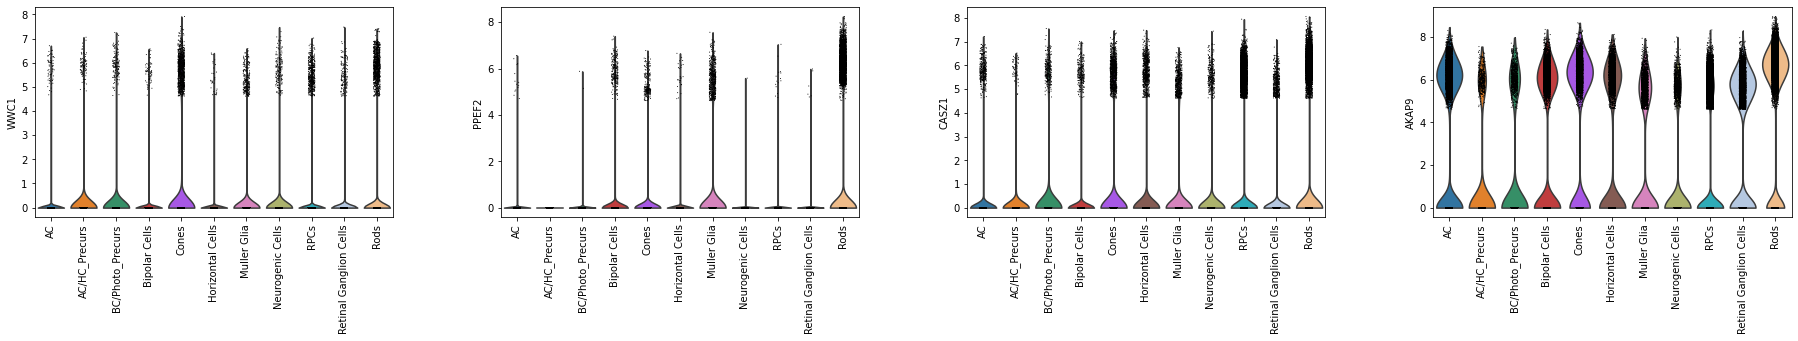

In [62]:
sc.pl.violin(adata, ["WWC1", "PPEF2", "CASZ1", "AKAP9"], groupby="celltype", rotation=90)

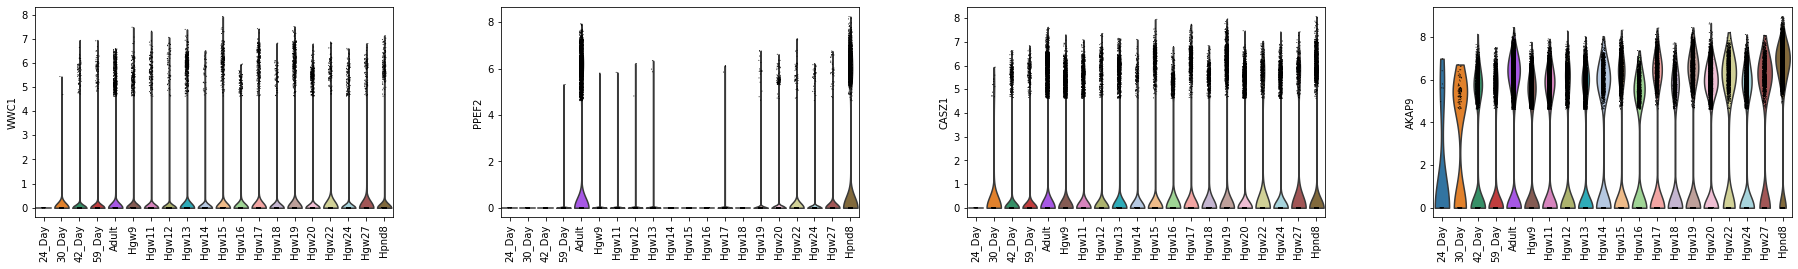

In [63]:
sc.pl.violin(adata, ["WWC1", "PPEF2", "CASZ1", "AKAP9"], groupby="age", rotation=90)

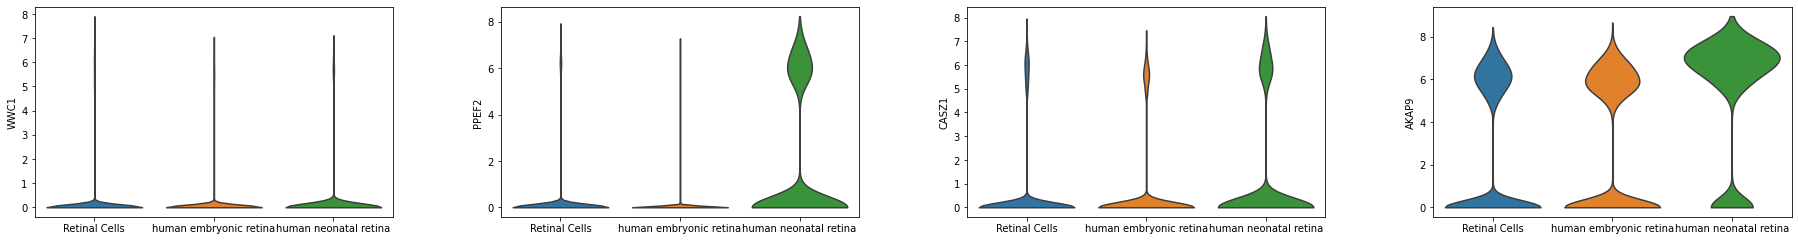

In [73]:
sc.pl.violin(adata, ["WWC1", "PPEF2", "CASZ1", "AKAP9"], groupby="source_name", rotation=0, stripplot=False)

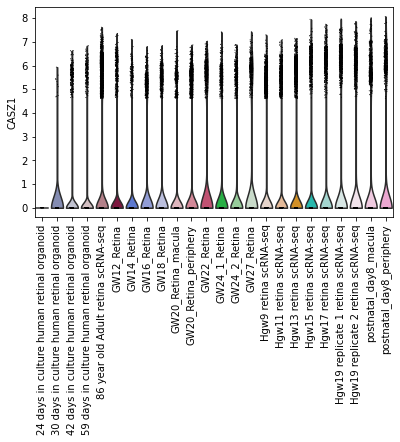

In [68]:
sc.pl.violin(adata, "CASZ1", groupby="title", rotation=90)

Retinal Cells


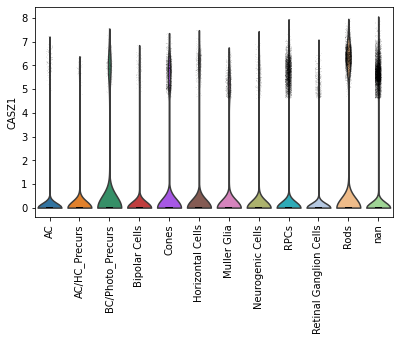

Human Embryonic Retina


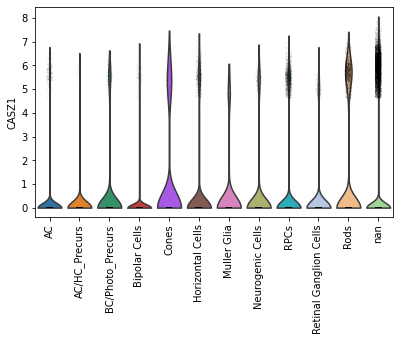

Human Neonatal Retina


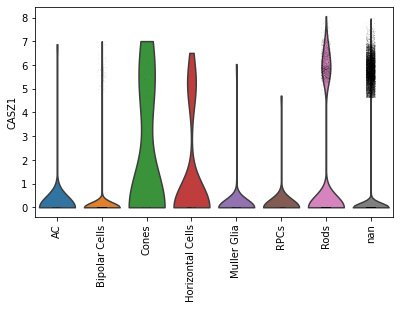

In [102]:
#CASZ1, Cell Source
print("Retinal Cells")
sc.pl.violin(adata, "CASZ1", groupby="celltype_RC", rotation=90, size=0.3, save="CASZ1_RC_plots.pdf")
print("Human Embryonic Retina")
sc.pl.violin(adata, "CASZ1", groupby="celltype_EC", rotation=90, size=0.3, save="CASZ1_EC_plots.pdf")
print("Human Neonatal Retina")
sc.pl.violin(adata, "CASZ1", groupby="celltype_NN", rotation=90, size=0.3, save="CASZ1_NN_plots.pdf")
#sc.pl.violin(adata, "CASZ1", groupby="celltype_NN", rotation=90, stripplot=False)

Retinal Cells


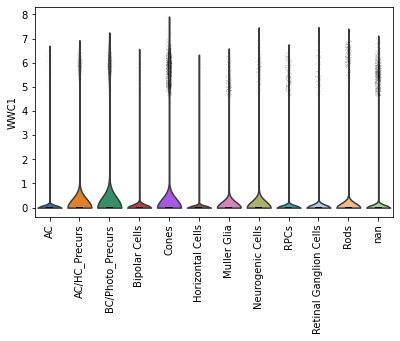

Human Embryonic Retina


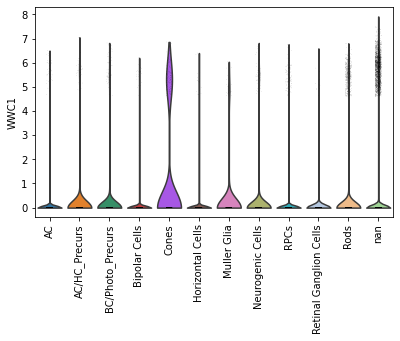

Human Neonatal Retina


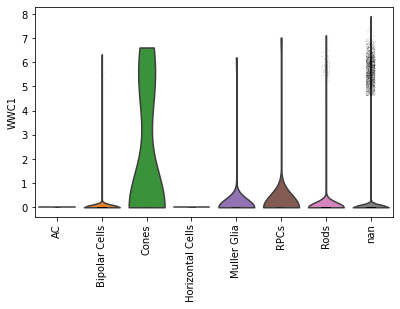

In [103]:
#WWC1, Cell Source
print("Retinal Cells")
sc.pl.violin(adata, "WWC1", groupby="celltype_RC", rotation=90, size=0.3, save="WWC1_RC_plots.pdf")
print("Human Embryonic Retina")
sc.pl.violin(adata, "WWC1", groupby="celltype_EC", rotation=90, size=0.3, save="WWC1_EC_plots.pdf")
print("Human Neonatal Retina")
sc.pl.violin(adata, "WWC1", groupby="celltype_NN", rotation=90, size=0.3, save="WWC1_NN_plots.pdf")
#sc.pl.violin(adata, "WWC1", groupby="celltype_NN", rotation=90, stripplot=False)

Retinal Cells


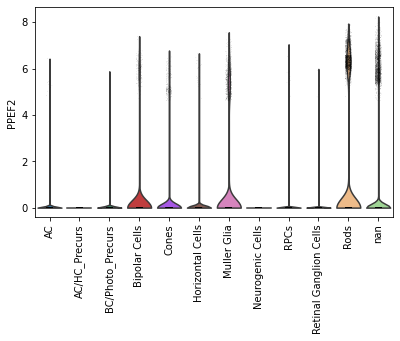

Human Embryonic Retina


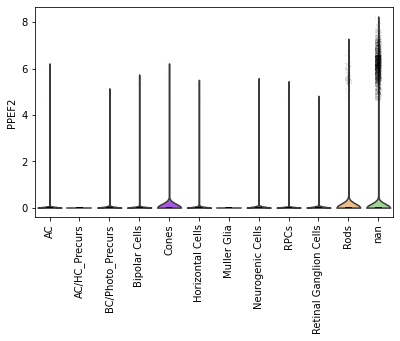

Human Neonatal Retina


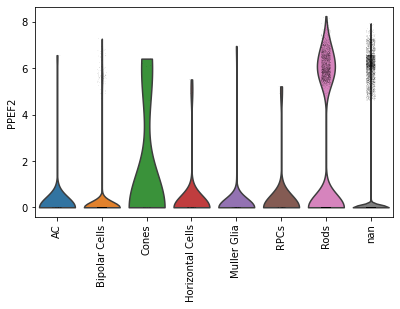

In [104]:
#PPEF2, Cell Source
print("Retinal Cells")
sc.pl.violin(adata, "PPEF2", groupby="celltype_RC", rotation=90, size=0.3, save="PPEF2_RC_plots.pdf")
print("Human Embryonic Retina")
sc.pl.violin(adata, "PPEF2", groupby="celltype_EC", rotation=90, size=0.3, save="PPEF2_EC_plots.pdf")
print("Human Neonatal Retina")
sc.pl.violin(adata, "PPEF2", groupby="celltype_NN", rotation=90, size=0.3, save="PPEF2_NN_plots.pdf")
#sc.pl.violin(adata, "PPEF2", groupby="celltype_NN", rotation=90, stripplot=False)

Retinal Cells


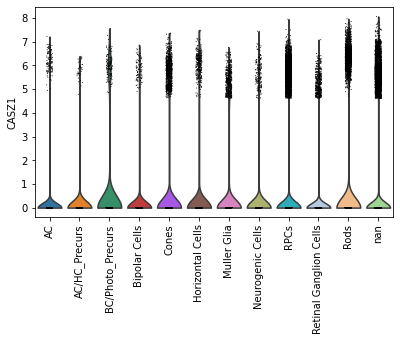

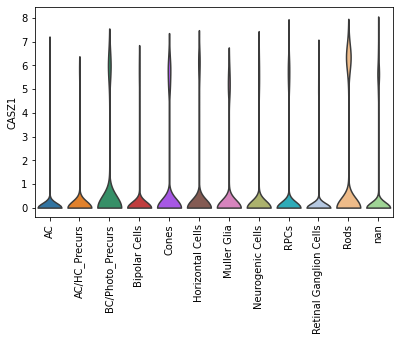

Human Embryonic Retina


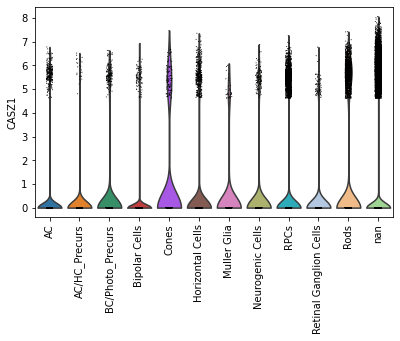

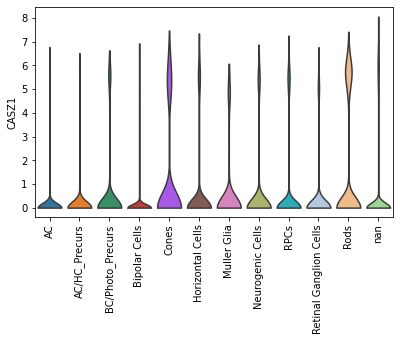

Human Neonatal Retina


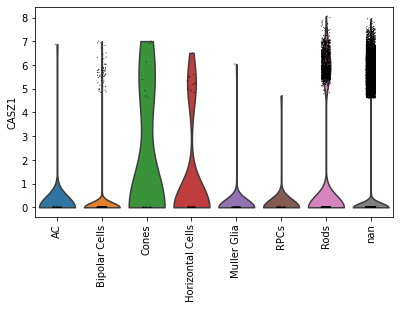

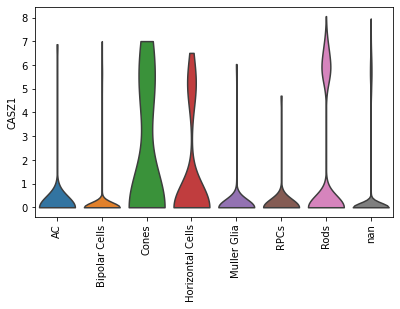

In [95]:
#Cell Source
print("Retinal Cells")
sc.pl.violin(adata, "CASZ1", groupby="celltype_RC", rotation=90)
sc.pl.violin(adata, "CASZ1", groupby="celltype_RC", rotation=90, stripplot=False)
print("Human Embryonic Retina")
sc.pl.violin(adata, "CASZ1", groupby="celltype_EC", rotation=90)
sc.pl.violin(adata, "CASZ1", groupby="celltype_EC", rotation=90, stripplot=False)
print("Human Neonatal Retina")
sc.pl.violin(adata, "CASZ1", groupby="celltype_NN", rotation=90)
sc.pl.violin(adata, "CASZ1", groupby="celltype_NN", rotation=90, stripplot=False)

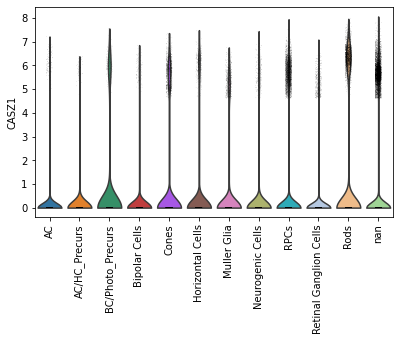

In [101]:
sc.pl.violin(adata, "CASZ1", groupby="celltype_RC", size=0.3, rotation=90,save="CASZ1_RC_plots.pdf")